In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('xAPI-Edu-Data.csv')

In [5]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


수치형 데이터: raisedhands, VisITedResources, AnnouncementsView, Discussion

범주형 데이터: gender, NationalITy, PlaceofBirth, StageID, GradeID, SectionID, Topic, Semester, Relation, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays

타겟 데이터: Class


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

(480, 17) → 480 rows 17 columns

null 데이터 없음

In [7]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [8]:
df['gender'].value_counts()

gender
M    305
F    175
Name: count, dtype: int64

여학생보다 남학생의 수가 더 많다.

In [9]:
df['NationalITy'].value_counts()

NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

대부분 쿠웨이트와 요르단 국적의 학생들이 많이 분포

In [10]:
df['PlaceofBirth'].value_counts()

PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

<Axes: xlabel='raisedhands', ylabel='Count'>

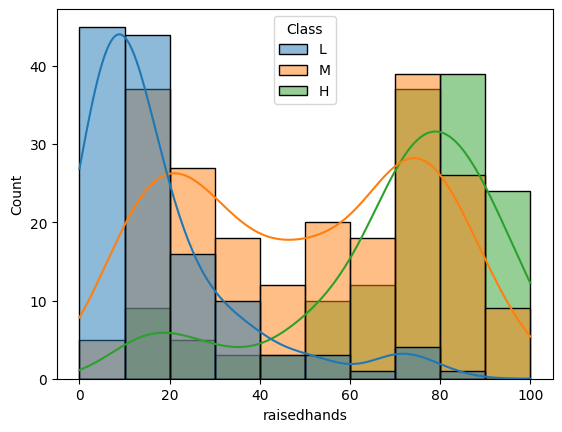

In [11]:
# seaborn의 histplot()로 히스토그램 그리기
# hue_order 옵션으로 hue 순서 결정
sns.histplot(x='raisedhands', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

학생이 수업 중 손을 든 횟수(raisedhands)가 많을수록 성적 등급이 높게 나온다. 

→ 수업 중 손을 든 횟수는 성적 등급에 영향을 준다.


<Axes: xlabel='VisITedResources', ylabel='Count'>

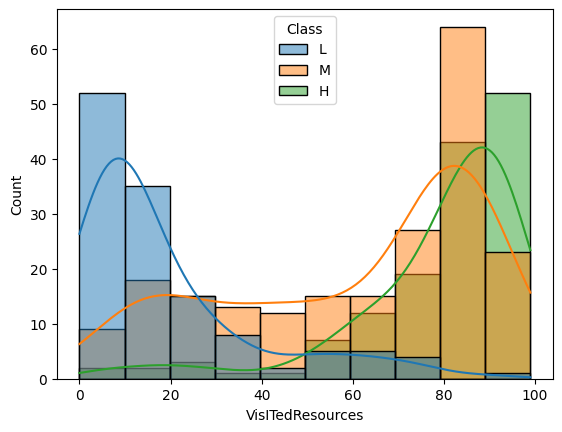

In [12]:
sns.histplot(x='VisITedResources', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

학생이 교과 과정을 방문한 횟수(VisITedResources)가 많을수록 성적 등급이 높게 나온다.

M, H 성적 등급의 대부분 학생들은 교과 과정 방문 횟수가 많다.

→ 교과 과정을 방문한 횟수는 성적 등급에 영향을 준다.


<Axes: xlabel='AnnouncementsView', ylabel='Count'>

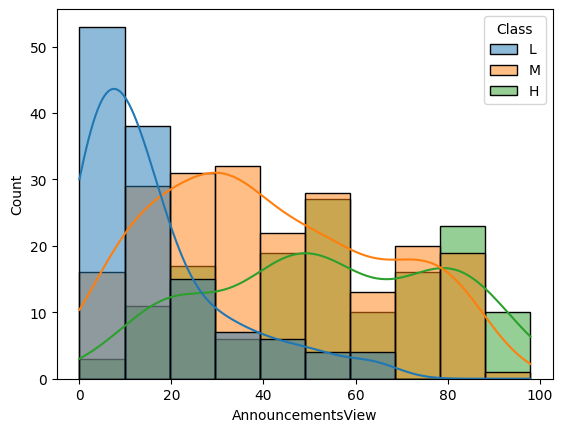

In [14]:
sns.histplot(x='AnnouncementsView', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

L 성적 등급의 학생들은 과목 공지를 확인한 횟수가 적다.

M, H 성적 등급의 학생들이 과목 공지를 확인한 횟수의 분산이 크다.

→ 과목 공지를 확인한 횟수(AnnouncementsView)는 성적 등급에 영향을 주는지 확실히 알 수 없다

<Axes: xlabel='Discussion', ylabel='Count'>

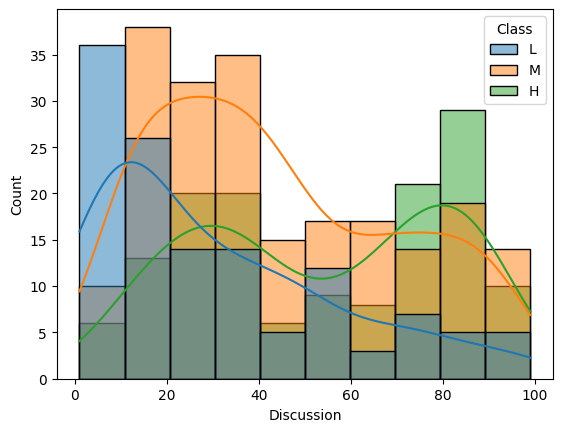

In [15]:
sns.histplot(x='Discussion', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

학생이 토론 그룹에 참여한 횟수(Discussion)는 성적 등급에 영향을 주지 않는 것으로 보인다.

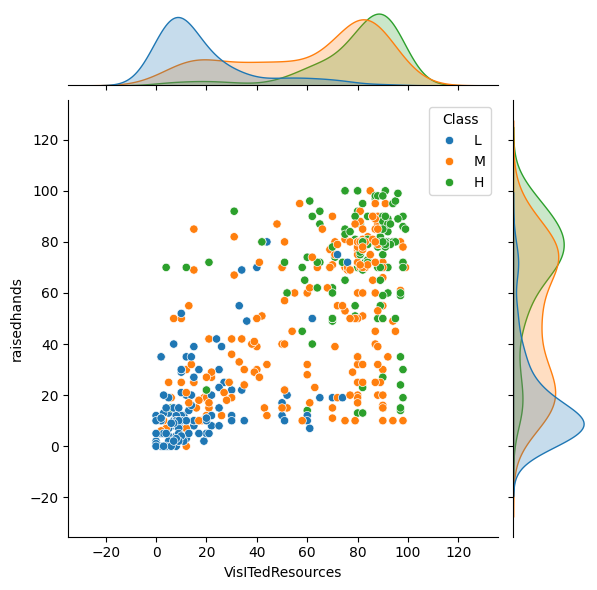

In [16]:
# seaborn의 jointplot()로 산점도와 히스토그램을 함께 그리기
sns.jointplot(x='VisITedResources', y='raisedhands', data=df, hue='Class', hue_order=['L', 'M', 'H'])

학생이 교과 과정을 방문한 횟수(VisITedResources)와 학생이 수업 중 손을 든 횟수(raisedhands)가 많을수록 성적 등급이 높다.

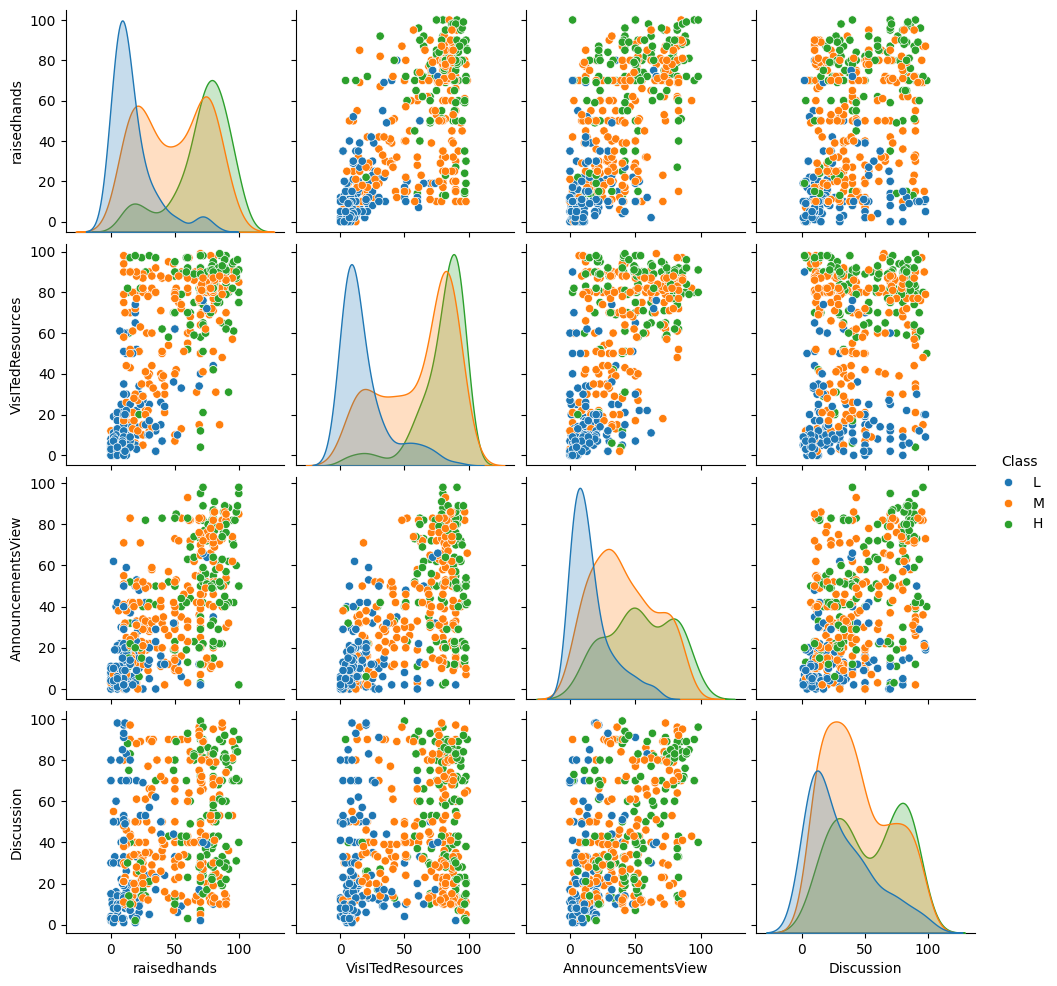

In [17]:
# seaborn의 pairplot()로 모든 경우의 jointplot을 한 번에 그리기
sns.pairplot(df, hue='Class', hue_order=['L', 'M', 'H'])

결과가 y=x 형태로 나타날수록 두 변수의 상관성이 높다.feature간의 correlation이 낮을수록 분석하기 좋다.

<Axes: xlabel='Class', ylabel='count'>

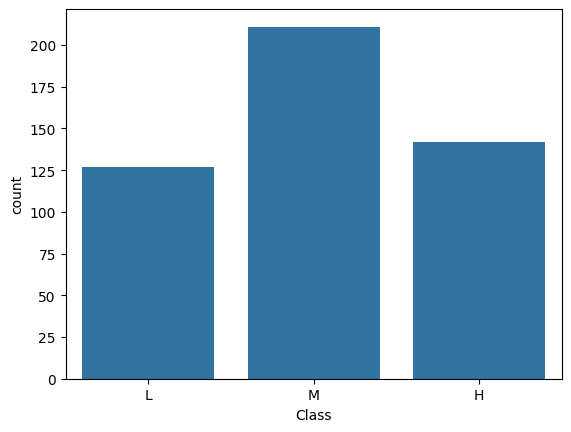

In [19]:
# seaborn의 countplot()로 범주별 통계 그리기
sns.countplot(x='Class', data=df, order=['L', 'M', 'H'])

성적 등급이 M(보통)인 학생들이 가장 많다.

<Axes: xlabel='gender', ylabel='count'>

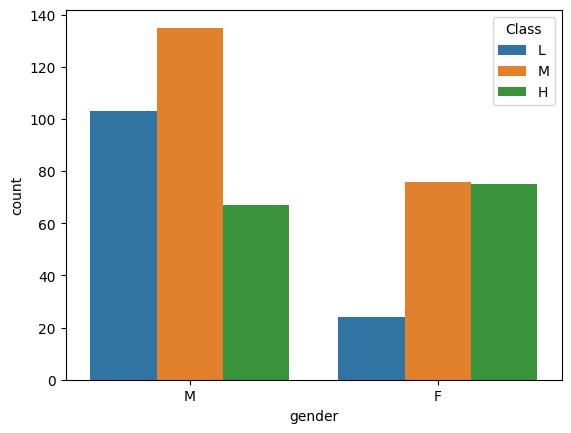

In [20]:
sns.countplot(x='gender', data=df, hue='Class', hue_order=['L', 'M', 'H'])

남학생들은 대부분 성적 등급이 M, L인 반면에 여학생들은 M, H 이다.

→ 대체로 여학생이 남학생보다 성적 등급이 높다.

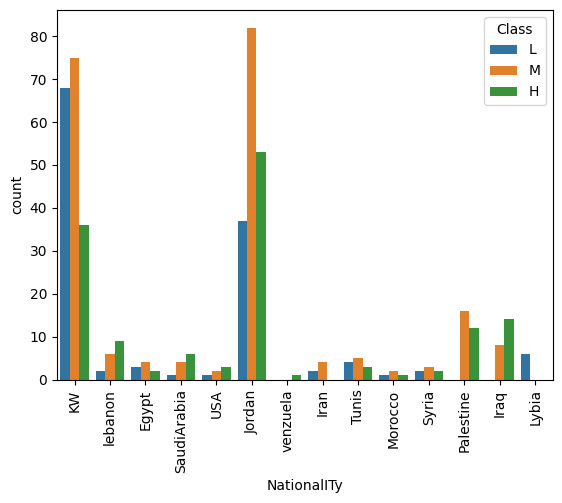

In [21]:
sns.countplot(x='NationalITy', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

대체로 쿠웨이트 국적의 학생보다 요르단 국적의 학생의 성적 등급이 더 높다.

베네수엘라 국적의 학생들은 모두 H 등급이고 리비아 국적의 학생들은 모두 L 등급이지만, 학생 수가 적기 때문에 상관관계를 확신할 수 없다.

<Axes: xlabel='ParentAnsweringSurvey', ylabel='count'>

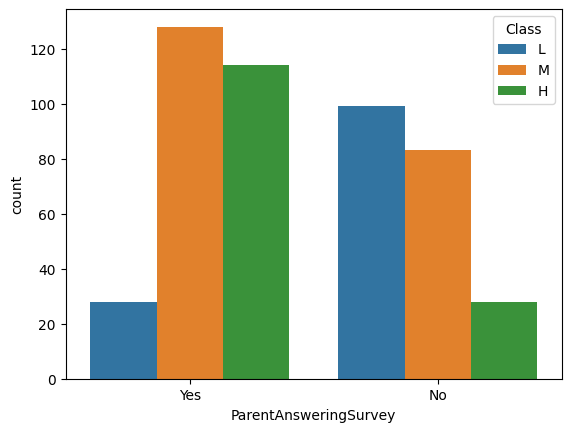

In [22]:
sns.countplot(x='ParentAnsweringSurvey', data=df, hue='Class', hue_order=['L', 'M', 'H'])

부모가 학교 설문에 참여한 학생이 그렇지 않은 학생보다 성적 등급이 더 높다.

<Axes: xlabel='ParentschoolSatisfaction', ylabel='count'>

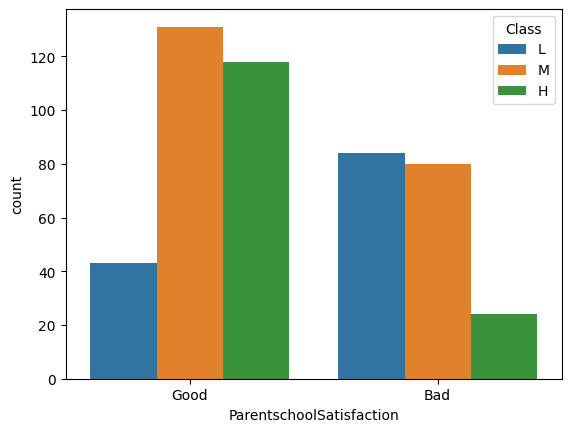

In [23]:
sns.countplot(x='ParentschoolSatisfaction', data=df, hue='Class', hue_order=['L', 'M', 'H'])

부모가 학교에 만족한 학생이 그렇지 않은 학생보다 성적 등급이 더 높다.

하지만 자녀의 성적이 좋기 때문에 부모가 학교에 만족한 것일 수도 있다.

설문 조사가 진행된 시기가 성적이 나오기 전/후인지 알 수 없기 때문에 분석에서 제외하는 것이 좋다.

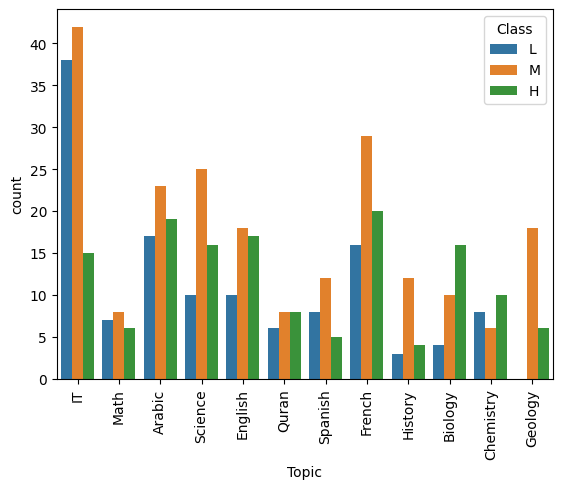

In [24]:
sns.countplot(x='Topic', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

IT 과목에서 높은 성적 등급을 받기 어려운 것으로 보인다.

생물학 과목을 수강한 학생들의 성적 등급은 높은 편이다.

In [25]:
# 범주형 데이터인 타겟 컬럼을 수치로 바꾸어 표현
# L: -1, M: 0, H:1
df['Class_value'] = df['Class'].map({'L': -1, 'M': 0, 'H': 1})
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


<BarContainer object of 2 artists>

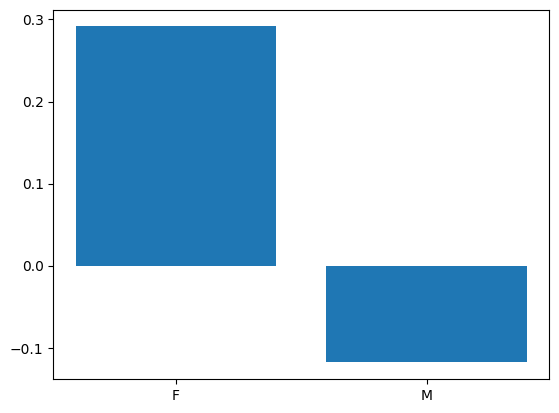

In [29]:
gb = df.groupby('gender')['Class_value'].mean()
plt.bar(gb.index, gb)

여학생이 남학생보다 평균 성적 등급이 높다.

<BarContainer object of 12 artists>

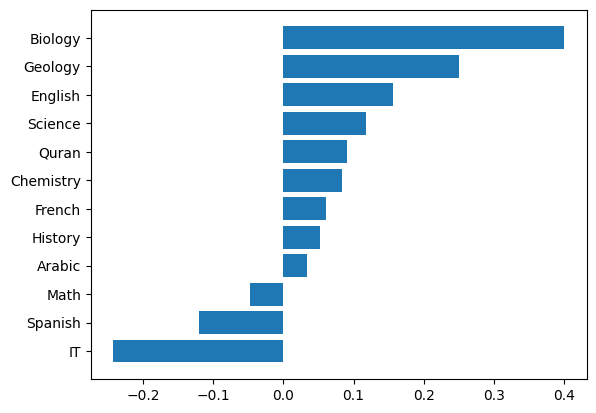

In [32]:
# ascending=True : 오름차순 정렬
gb = df.groupby('Topic')['Class_value'].mean().sort_values()
plt.barh(gb.index, gb)

IT, 스페인어, 수학을 수강한 학생들의 평균 성적 등급은 낮은 편이다.

생물학, 지질학, 영어를 수강한 학생들의 평균 성적 등급은 높은 편이다.

<BarContainer object of 2 artists>

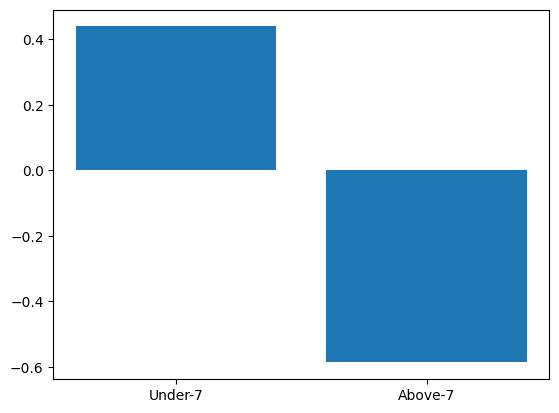

In [33]:
# ascending=False : 내림차순 정렬
gb = df.groupby('StudentAbsenceDays')['Class_value'].mean().sort_values(ascending=False)
plt.bar(gb.index, gb)

결석 횟수가 7회를 넘지 않는 학생이 넘는 학생보다 평균 성적 등급이 높다.

# 데이터 전처리

In [34]:
# get_dummies()를 이용하여 범주형 데이터 전처리
# drop_first 옵션으로 첫 번째 카테고리 값 사용 결정
X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class', 'Class_value'], axis=1),
               	   columns=['gender', 'NationalITy', 'PlaceofBirth',
                        'StageID', 'GradeID', 'SectionID', 'Topic',
                        'Semester', 'Relation', 'ParentAnsweringSurvey',
                        'StudentAbsenceDays'],
               	   drop_first=True)

y = df['Class']

In [35]:
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,True
1,20,20,3,25,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,True
2,10,7,0,30,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,30,25,5,35,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
4,40,50,12,50,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
476,50,77,14,28,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
477,55,74,25,29,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
478,30,17,14,57,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


# 학습 데이터와 테스트 데이터 분리

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# train_test_split을 이용하여 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Classification 모델 학습

1. Logistic Regression 모델

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# LogisticRegression 모델 생성/학습
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT. -> max_iter 늘리기
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [41]:
from sklearn.metrics import classification_report

In [43]:
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.79      0.79      0.79        33
           M       0.60      0.68      0.64        56

    accuracy                           0.70       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.71      0.70      0.70       144



정확도(accuracy) = 0.70 (70%)

<br>

2. XGBoost 모델

In [44]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier(eval_metric='mlogloss')
model_xgb.fit(x_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['H' 'L' 'M']